Q1. MAPE

Q2. Stationarity

Q3. An AR and ARIMA Model

Q4. Integrated

Q5. Clustering

Q6. Autoregressive

Q7. p = 1, q = 0

Q8. TRUE

Q9. FALSE

Q10. Trend, seasonality, cycles and random variations

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
import zipfile

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip '/content/drive/MyDrive/Hamoye/household_power_consumption.zip'

Archive:  /content/drive/MyDrive/Hamoye/household_power_consumption.zip
replace household_power_consumption.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [4]:
data = '/content/household_power_consumption.txt'

quiz_data = pd.read_csv(data, sep = ';', header=0, parse_dates={'datetime':[0,1]}, index_col=['datetime'],
                 low_memory=False, infer_datetime_format=True)

quiz_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
quiz_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [6]:
# replacing the '?' with nan and converting the datatype to float

quiz_data.replace('?', 'nan', inplace=True)

quiz_data = quiz_data.astype('float32')

In [7]:
quiz_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float32
 1   Global_reactive_power  float32
 2   Voltage                float32
 3   Global_intensity       float32
 4   Sub_metering_1         float32
 5   Sub_metering_2         float32
 6   Sub_metering_3         float32
dtypes: float32(7)
memory usage: 71.2 MB


In [8]:
# checking for null values

quiz_data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [9]:
# using mean inputation to fill the null values

quiz_data = quiz_data.apply(lambda x: x.fillna(x.mean()), axis=0)

quiz_data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
# checking for the summary statistics of the data

quiz_data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091373e+00,1.237164e-01,2.435335e+02,4.630594e+00,1.121211e+00,1.298031e+00,6.454503e+00
std,1.050167e+00,1.121103e-01,4.183342e+00,4.412327e+00,6.065988e+00,5.722075e+00,8.405821e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.410500e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.429700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


Q11. Plot of the global_active_power over time

In [11]:
# resampling to daily sample rates

quiz_data_daily = quiz_data.resample('D').sum()

In [12]:
quiz_data_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


Text(0.5, 1.0, 'Plot of Global_active_power versus Datetime')

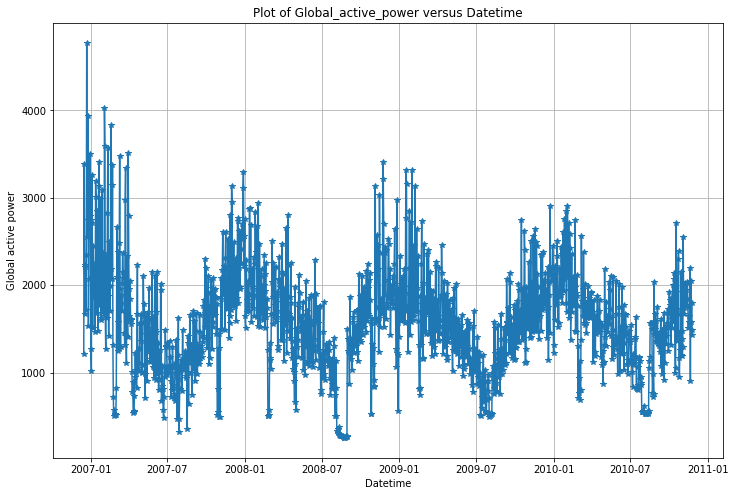

In [13]:
x = quiz_data_daily.index
y = quiz_data_daily.Global_active_power

plt.figure(figsize=(12,8))
plt.plot(x, y, marker='*')
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('Global active power')
plt.title('Plot of Global_active_power versus Datetime')

Q12.  Pearson correlation coefficient between the global_active_power and global_reactive_power, to 2 decimal places

In [14]:
from scipy.stats import pearsonr

In [56]:
list_1 = quiz_data_daily['Global_active_power']
list_2 = quiz_data_daily['Global_reactive_power']

corr_1, _ = pearsonr(list_1, list_2)

corr_1

0.04109788470945897

Q13. Pearson correlation coefficient = 0.052

In [16]:
corr_2, _ = pearsonr(quiz_data_daily.Voltage, quiz_data_daily.Global_intensity)
corr_2

0.05221350712869457

Q14. MAPE = 20.82

Q15. RMSE = 374.6042

In [17]:
train_data = quiz_data_daily.iloc[:1077,:]

In [18]:
train_data.shape

(1077, 7)

In [19]:
test_data = quiz_data_daily.iloc[1077:,:]

In [20]:
test_data.shape

(365, 7)

In [21]:
from fbprophet import Prophet

In [22]:
train_data.reset_index(inplace = True)
train_data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [23]:
data_train = train_data.iloc[:,:2]

In [24]:
data_train = data_train.rename(columns={"datetime": "ds", "Global_active_power": "y"})
data_train.head()

,ds,y
0,2006-12-16,1209.176025
1,2006-12-17,3390.459961
2,2006-12-18,2203.825928
3,2006-12-19,1666.193970
4,2006-12-20,2225.748047


In [25]:
test_data.reset_index(inplace = True)
test_data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2009-11-27,1380.026001,133.052002,348276.68750,5704.000000,0.0,396.0,11599.0
1,2009-11-28,1858.949951,225.218002,347898.87500,7784.799805,3199.0,386.0,14350.0
2,2009-11-29,1650.962036,191.056000,350364.56250,6878.399902,1073.0,3061.0,7828.0
3,2009-11-30,1745.189941,153.382004,351020.59375,7232.200195,1080.0,361.0,12039.0
4,2009-12-01,1756.378052,141.873993,349391.75000,7312.799805,0.0,354.0,10821.0


In [26]:
data_test = test_data.iloc[:,:2]

In [27]:
data_test = data_test.rename(columns={"datetime": "ds", "Global_active_power": "y"})
data_test.head()

,ds,y
0,2009-11-27,1380.026001
1,2009-11-28,1858.949951
2,2009-11-29,1650.962036
3,2009-11-30,1745.189941
4,2009-12-01,1756.378052


In [28]:
model = Prophet()
model.fit(data_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
forecast = model.predict(data_test) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1580.084009,1579.868499,2665.392212,1580.084009,1580.084009,519.056899,519.056899,519.056899,-64.127019,-64.127019,-64.127019,583.183918,583.183918,583.183918,0.0,0.0,0.0,2099.140908
1,2009-11-28,1580.207768,1806.058841,2988.780039,1580.207768,1580.207768,822.213567,822.213567,822.213567,245.813256,245.813256,245.813256,576.400311,576.400311,576.400311,0.0,0.0,0.0,2402.421335
2,2009-11-29,1580.331526,1801.641168,2943.634300,1580.331526,1580.331526,796.157722,796.157722,796.157722,228.519177,228.519177,228.519177,567.638545,567.638545,567.638545,0.0,0.0,0.0,2376.489248
3,2009-11-30,1580.455285,1449.649019,2583.657597,1580.455285,1580.455285,396.118617,396.118617,396.118617,-161.286790,-161.286790,-161.286790,557.405408,557.405408,557.405408,0.0,0.0,0.0,1976.573902
4,2009-12-01,1580.579043,1535.241582,2643.477819,1580.579043,1580.579043,516.895388,516.895388,516.895388,-29.332428,-29.332428,-29.332428,546.227816,546.227816,546.227816,0.0,0.0,0.0,2097.474431


In [30]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2009-11-27,2099.140908,1579.868499,2665.392212,1580.084009,1580.084009,1580.084009
1,2009-11-28,2402.421335,1806.058841,2988.780039,1580.207768,1580.207768,1580.207768
2,2009-11-29,2376.489248,1801.641168,2943.634300,1580.331526,1580.331526,1580.331526
3,2009-11-30,1976.573902,1449.649019,2583.657597,1580.455285,1580.455285,1580.455285
4,2009-12-01,2097.474431,1535.241582,2643.477819,1580.579043,1580.579043,1580.579043


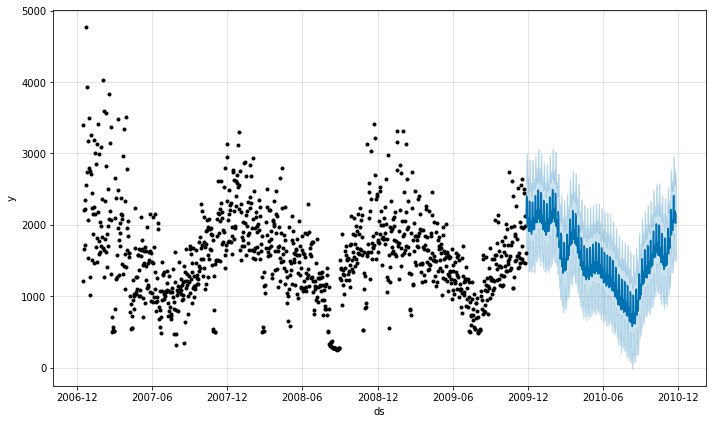

In [31]:
model.plot(forecast)
plt.show()

In [32]:
from sklearn import metrics

In [33]:
def mape(Y_actual,Y_Predicted):
    return np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100

In [34]:
MAPE = mape(data_test['y'],forecast['yhat'])
print(f'MAPE: {round(MAPE,2)}')

MAPE: 20.82


In [35]:
RMSE = np.sqrt(metrics.mean_squared_error(data_test['y'],forecast['yhat']))
RMSE
round(RMSE,4)

374.6042

Q16. August

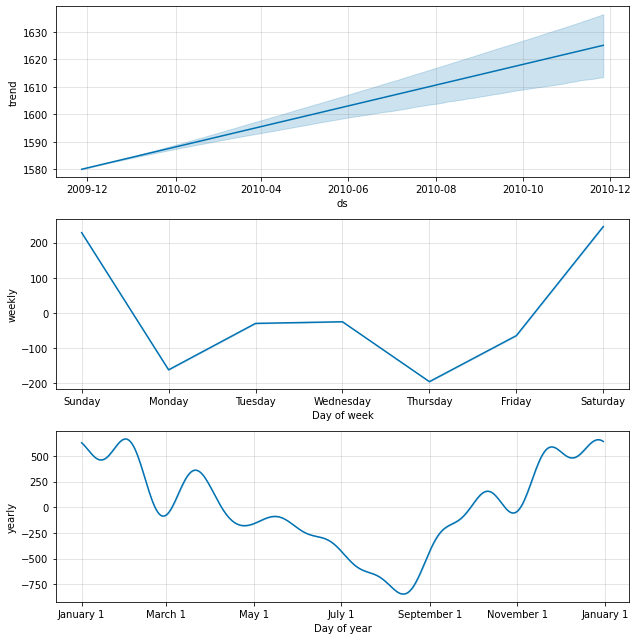

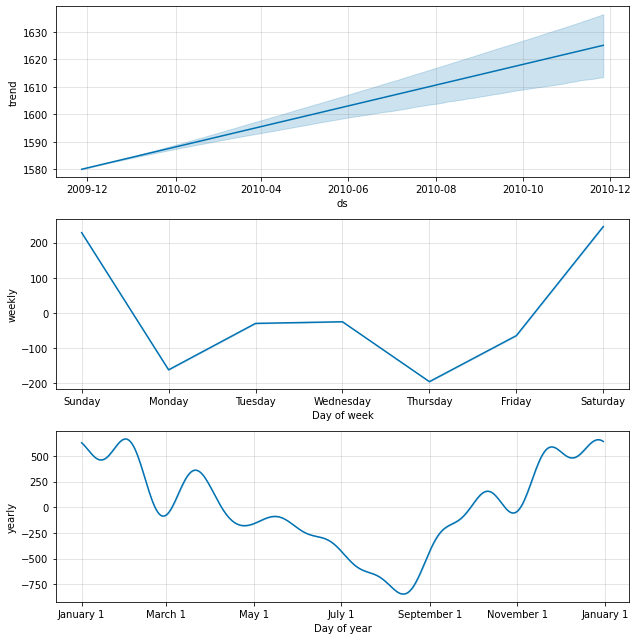

In [36]:
model.plot_components(forecast)

Q17. MAPE = 3.04

Q18. RMSE = 44.8791

In [37]:
quiz_data_daily.reset_index(inplace=True)

quiz_data_daily.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [38]:
new_data_daily = quiz_data_daily.rename(columns = {'datetime':'ds','Global_active_power':'y',
                                           'Global_reactive_power':'add1','Voltage':'add2',
                                           'Global_intensity':'add3','Sub_metering_1':'add4',
                                          'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [39]:
new_data_daily.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [40]:
# taking the first hundred observations for training
new_train = new_data_daily.iloc[:1077,:]
new_test = new_data_daily.iloc[1077:,:]
print(new_test.shape)
print(new_train.shape)

(365, 8)
(1077, 8)


In [41]:
#creating the model
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

In [42]:
#fitting the model to train data
model = model.fit(new_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
#making prediction with test set
prediction = model.predict(new_test)

prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,add3,add3_lower,add3_upper,add4,add4_lower,add4_upper,add5,add5_lower,add5_upper,add6,add6_lower,add6_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1597.207251,1364.776246,1396.733534,1597.207251,1597.207251,7.516635,7.516635,7.516635,0.616011,0.616011,0.616011,-232.333805,-232.333805,-232.333805,2.202791,2.202791,2.202791,0.825649,0.825649,0.825649,3.864961,3.864961,3.864961,-216.018146,-216.018146,-216.018146,-217.307759,-217.307759,-217.307759,-0.101979,-0.101979,-0.101979,1.391591,1.391591,1.391591,0.0,0.0,0.0,1381.189105
1,2009-11-28,1597.347956,1845.972353,1879.457731,1597.347956,1597.347956,-8.857395,-8.857395,-8.857395,0.505812,0.505812,0.505812,263.405656,263.405656,263.405656,-2.028400,-2.028400,-2.028400,0.830930,0.830930,0.830930,7.751815,7.751815,7.751815,264.708105,264.708105,264.708105,261.608418,261.608418,261.608418,1.386425,1.386425,1.386425,1.713262,1.713262,1.713262,0.0,0.0,0.0,1862.056061
2,2009-11-29,1597.488661,1629.455582,1660.362303,1597.488661,1597.488661,-2.788241,-2.788241,-2.788241,1.224994,1.224994,1.224994,47.460713,47.460713,47.460713,0.783576,0.783576,0.783576,-0.581772,-0.581772,-0.581772,-1.463038,-1.463038,-1.463038,46.847909,46.847909,46.847909,44.636232,44.636232,44.636232,0.141167,0.141167,0.141167,2.070510,2.070510,2.070510,0.0,0.0,0.0,1644.336570
3,2009-11-30,1597.629366,1726.020588,1758.355096,1597.629366,1597.629366,3.904847,3.904847,3.904847,1.416343,1.416343,1.416343,131.751742,131.751742,131.751742,0.774317,0.774317,0.774317,0.844133,0.844133,0.844133,4.486631,4.486631,4.486631,145.311316,145.311316,145.311316,143.178013,143.178013,143.178013,-0.334593,-0.334593,-0.334593,2.467896,2.467896,2.467896,0.0,0.0,0.0,1742.940683
4,2009-12-01,1597.770071,1746.295757,1780.035677,1597.770071,1597.770071,5.949337,5.949337,5.949337,0.941248,0.941248,0.941248,150.954176,150.954176,150.954176,2.202791,2.202791,2.202791,0.847829,0.847829,0.847829,2.765734,2.765734,2.765734,164.911595,164.911595,164.911595,163.661116,163.661116,163.661116,-1.658690,-1.658690,-1.658690,2.909169,2.909169,2.909169,0.0,0.0,0.0,1762.681666


Q19. Tuesday

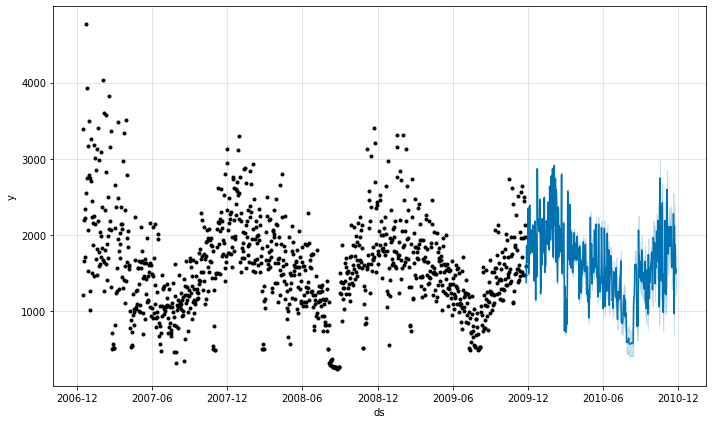

In [47]:
model.plot(prediction)
plt.show()

In [48]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [50]:
MAPE = Metric(new_test['y'],prediction['yhat'])
print(f'Mean Average Percentage Error ( MAPE):{round(MAPE,2)}')

Mean Average Percentage Error ( MAPE):3.04


In [51]:
# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(new_test['y'],prediction['yhat']))
RMSE
round(RMSE,4)

44.8791

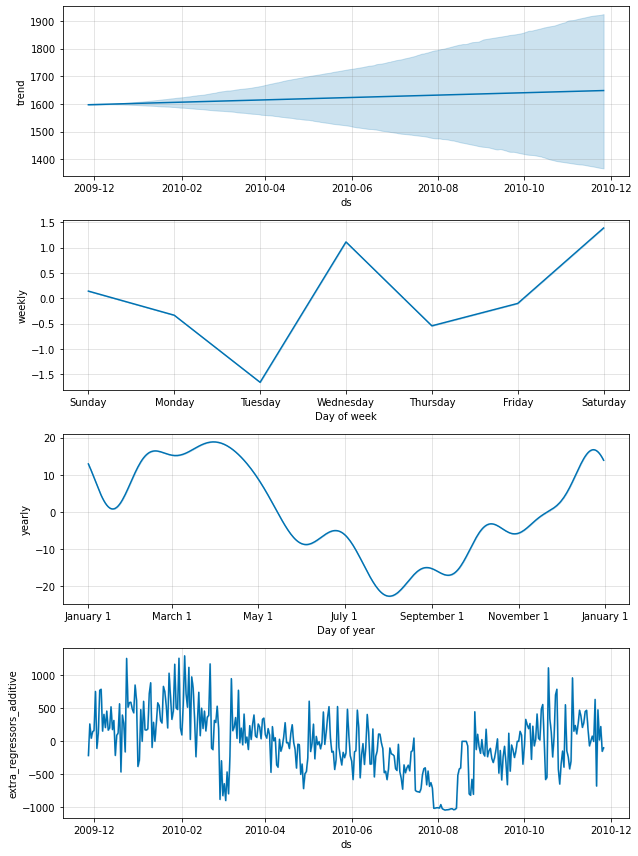

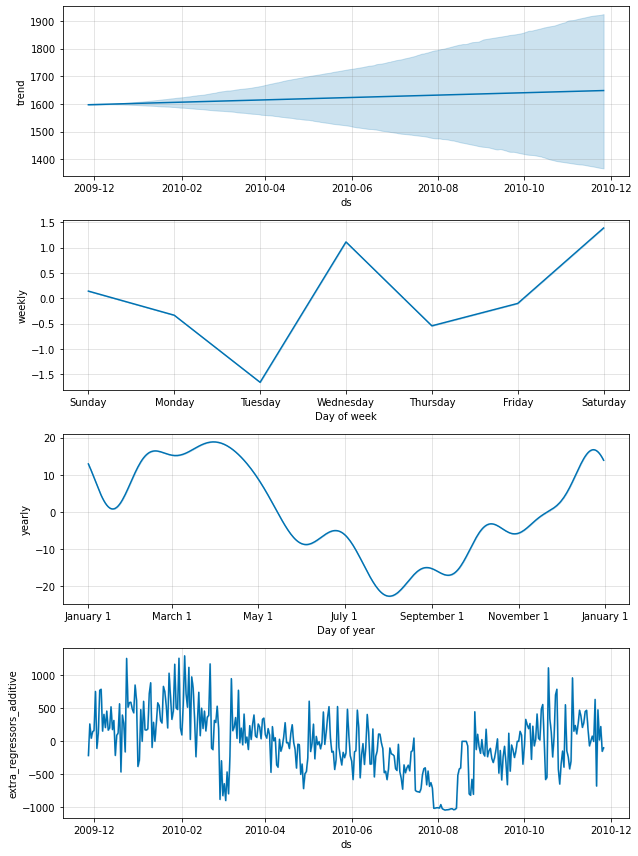

In [52]:
model.plot_components(prediction)

Q20. Forward fill